# EDA

- Instacart is an American online grocery delivery service
- User use website or app to make purchases 
- The objective here is to find if an item is reordered or not based on user's history or items sale history
- Some of the good analysis to perform is to find what items are reordered the most depending on their type and nature 
- There are a total of 7 datasets each one contaning different aspect of the orders being made 
- Lets analyze each dataset and find patterns on the reorders 

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt   # Importing necessary libraries 
import seaborn as sns
import numpy as np
from matplotlib.pyplot import figure
from matplotlib import pyplot

In [4]:
aisles = pd.read_csv(r"/content/drive/MyDrive/Instacart/aisles.csv")
depart = pd.read_csv(r"/content/drive/MyDrive/Instacart/departments.csv")
prior = pd.read_csv(r"/content/drive/MyDrive/Instacart/order_products__prior.csv")
train = pd.read_csv(r"/content/drive/MyDrive/Instacart/order_products__train.csv")  #importing the given datasets
orders = pd.read_csv(r"/content/drive/MyDrive/Instacart/orders.csv")
products = pd.read_csv(r"/content/drive/MyDrive/Instacart/products.csv")

#### Checking NAN values

In [ ]:
aisles.isnull().values.any() 

False

In [ ]:
depart.isnull().values.any()

False

In [ ]:
prior.isnull().values.any()

False

In [ ]:
train.isnull().values.any()

False

In [ ]:
orders.isnull().values.any()

True

In [ ]:
products.isnull().values.any()

False

- Only the ***Orders*** dataset contains NAN values
- The rest of the datasets are clean
- We will explore the NAN values of ***Orders*** dataset later down the analysis 

#### Popular Items

- The *Order products prior* dataset contains the order history for a particular product .
- It says if a product was reordered or not at different times 
- We can get a good idea of the items that were reordered form most to least

In [ ]:
prior.head(2)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1


In [9]:
pri1 = prior[prior['reordered'] != 0] # considering only the points which are reoedered 
count= pri1.groupby(['product_id']).count()  #grouping by the product id
fin_count=count.sort_values(by=['reordered'], ascending=False) #sorting the values 
fin_count.reset_index(inplace=True)   #index reset
merged1 = pd.merge(fin_count, products, how="inner", on="product_id") #merging the datasets to get procust names

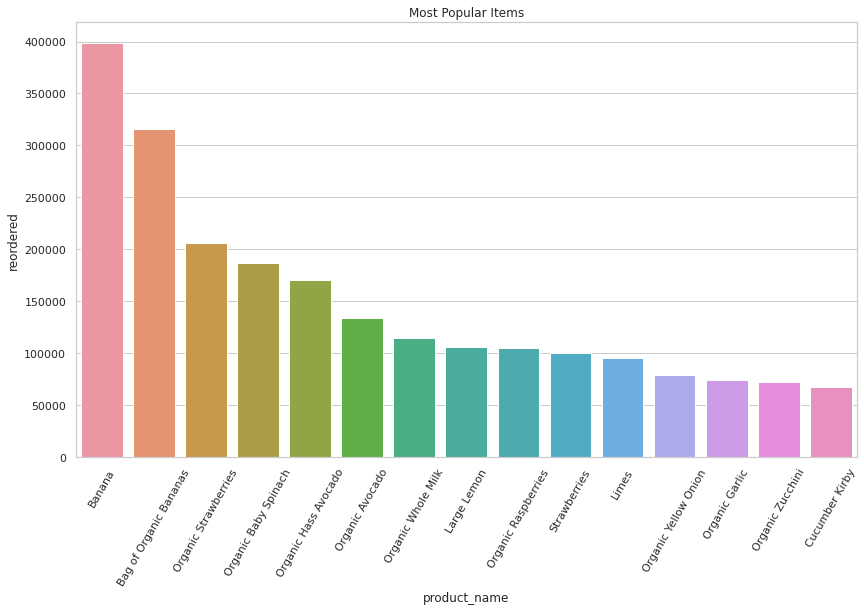

In [10]:
sns.set_theme(style="whitegrid") #setting the background to whitegrid
a4_dims = (14, 8) #initializing dimensions of the plot
fig, ax = pyplot.subplots(figsize=a4_dims)  
ax = sns.barplot(ax=ax,x="product_name", y="reordered", data=merged1.head(15)) #plotting 
plt.xticks(rotation=60) #changing the rotation of the names on the x-axis for better fit
plt.title('Most Popular Items');

- Plottig a bar graph between items vs total number of times that item was  reordered and considering the top 15
- From the plot its apparent that the most reordered items are bananas 
- Bananas and Organic Bananas occupy the top 2 spots with near 400000 and 320000 times reordered respectively
- We can conclude that the Most popular items are are all organic fruits and vegetables which doesn't come as a surprise  
- So if an item is a vegetable or a fruit it has a very good chance of being reordered 

#### Popular department

In [ ]:
depart.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [ ]:
len(depart)

21

- The department dataset contains the various names of the departments and theird ID
- There are 21 unique departments by which items are categorized and further divided in to different aisles
- Lets find the department that has good chance of being reordered .


In [11]:
depart_merge=pd.merge(pri1, products, how="inner", on="product_id") #Merging necessary datasets 
depart_merge1=pd.merge(depart_merge, depart, how="inner", on="department_id")
depart_count= depart_merge1.groupby(['department']).count() #Grouping by department and getting count 
depart_count['reordered']= depart_count['reordered']/depart_count['reordered'].sum() #Finding the percentage 
depart_count=depart_count.sort_values(by=['reordered'], ascending=True) # sorting 
depart_count.reset_index(inplace=True) #index reset

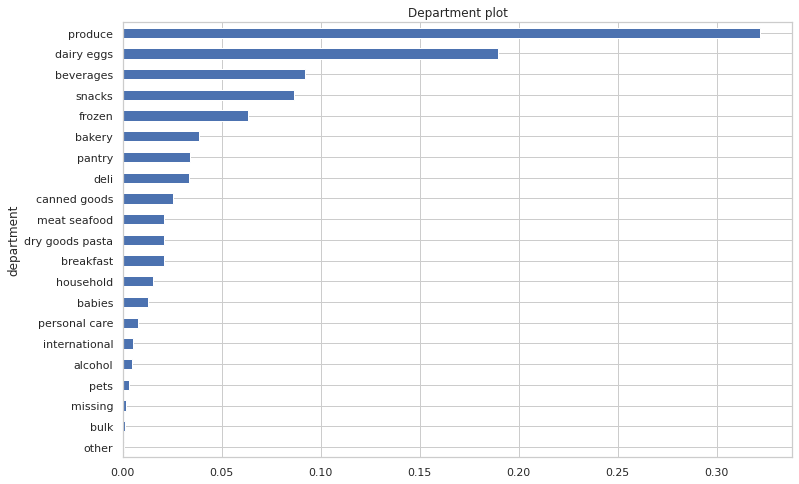

In [12]:
dp = depart_count.set_index('department')['reordered'] 
ax = dp.plot(kind='barh',figsize=(12, 8),title='Department plot') # Bar horizontal plot
plt.plot();

- Plotting a bar graph between departent and it's percentage of times each department was reordered 
- Looking at the department , It is clear that *produce* is overwhelmingly popular with more than 30% of the total, followed by *dairy eggs* with around 18%
- This also coincides with our previous observation with organic items being most reordered 
- We can confirm that organic goods have a strong chance of being picked up 
- Having Organic fruits and Vegetables always in stock is a good idea 
- We can conclude that if an item is picked by an user , that item belonging to produce or dairy department is likely

#### Popular aisles

In [ ]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [ ]:
 len(aisles)

134

- The aisles contains the name and id of the various aisles in the dataset
- There are 134 unique isles each representing different category of items

In [13]:
aisle_merge=pd.merge(pri1, products, how="inner", on="product_id") #merging
aisle_merge=pd.merge(aisle_merge, aisles, how="inner", on="aisle_id")
aisle_merge= aisle_merge.groupby(['aisle']).count() #grouping 
aisle_merge=aisle_merge.sort_values(by=['reordered'], ascending=False) #sorting 
aisle_merge.reset_index(inplace=True) #index reset
a1=aisle_merge.head(20) #taking top 20

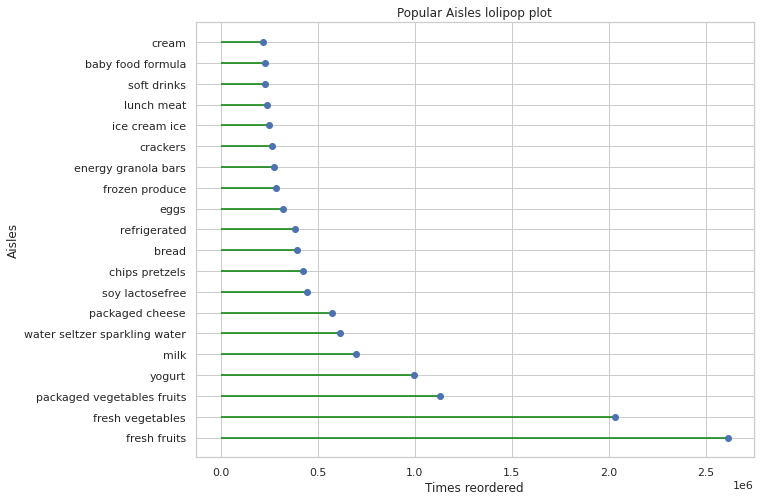

In [22]:
# https://python-graph-gallery.com/182-vertical-lollipop-plot/
figure(figsize=(10, 8)) # setting plot size
r=range(1,len(a1.index)+1) # Setting the max length
plt.hlines(y=r, xmin=0, xmax=a1['reordered'], color='green')  # using hlines function to plot a lollopop plot        
plt.plot(a1['reordered'], r, "o")                  
plt.yticks(r, a1['aisle']) # setting range and names for y axis
plt.title("Popular Aisles lolipop plot") # Title name
plt.xlabel('Times reordered')  # axis names 
plt.ylabel('Aisles')
plt.show();

- Plotting a lollipop plot for top 20 aisles gives a good picture of the most popular ones
- Fresh fruits being most reordered , an observation which we have seen before as the most popular item being the Banana and department being Produce 
- The second and third most reordered are fresh vegetables and packed vegetable fruits 
- Hence , from the previous observations and the current one , we can firmly conclude that an item will be reordered the most if that item is either a fruit or a vegetable 
- Now to find the aisles that are not popular

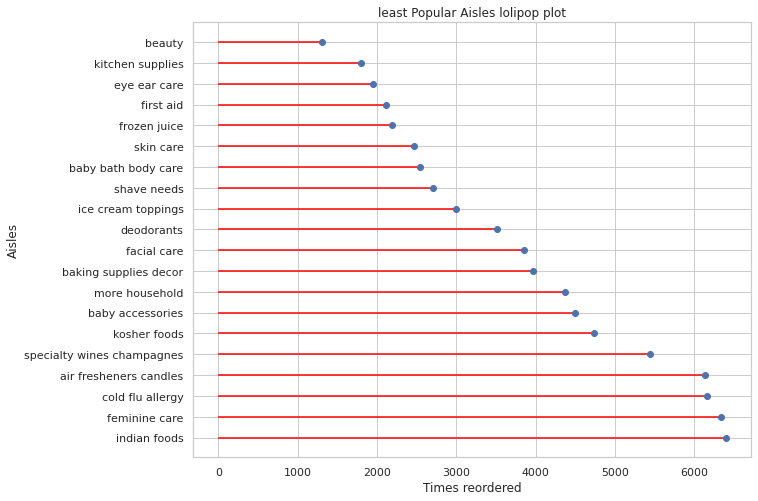

In [21]:
a2=aisle_merge.tail(20) # taking bottom 20
figure(figsize=(10, 8)) # setting plot size
r=range(1,len(a2.index)+1) # Setting the max length
plt.hlines(y=r, xmin=0, xmax=a2['reordered'], color='red')  # using hlines function to plot a lollopop plot        
plt.plot(a2['reordered'], r, "o")                  
plt.yticks(r, a2['aisle']) # setting range and names for y
plt.title("least Popular Aisles lolipop plot") # Title name
plt.xlabel('Times reordered')  # axis names 
plt.ylabel('Aisles')
plt.show();

- Plotting a lollipop plot between aisles and times each aisle was reordered
- The least popular aisle belongs to beauty products 
- But looking closely there are similarities between these ailses 
- most of them belong to kitchen supplies or body care or medical products .
- we can conclude here that items belonging these aisles have the least chance of being reordered 

#### User Buying patterns


- The orders dataset contains the time and day in which users made their purchase 
- This dataset also contains the number of days since a user's last order 
- We found out at the beginning that this dataset contains NAN values 
- Lets explore this further 

In [ ]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [ ]:
orders.isnull().any() #checking for nan values

order_id                  False
user_id                   False
eval_set                  False
order_number              False
order_dow                 False
order_hour_of_day         False
days_since_prior_order     True
dtype: bool

In [ ]:
orders['days_since_prior_order'].isnull().values.sum() #sum of nan values

206209

- Out of the 7 features in ***Orders*** dataset only *days_since_prior_order* has about 200 thousand nan values 
- Thats a lot of NAN values. Checking if that contains a pattern is a good idea

In [ ]:
order_nan = orders[orders['days_since_prior_order'].isnull()] #considering the points which are only nan

In [ ]:
order_nan.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
11,2168274,2,prior,1,2,11,NaN
26,1374495,3,prior,1,1,14,NaN
39,3343014,4,prior,1,6,11,NaN
45,2717275,5,prior,1,3,12,NaN


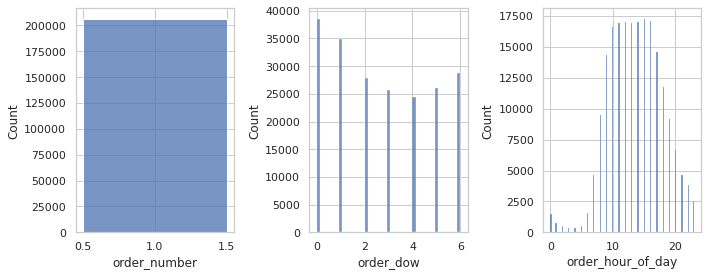

In [ ]:
fig, ax =plt.subplots(1,3,figsize=(10,4))  # setting the subplots dimensions and order 
sns.histplot(data=order_nan,x="order_number", ax=ax[0]) #plotting hiostogram
sns.histplot(data=order_nan,x='order_dow', ax=ax[1])
sns.histplot(data=order_nan,x='order_hour_of_day', ax=ax[2])
fig.show()
plt.tight_layout()  #adjusting the subplots layouts so they dont merge 

- Upon plotting a Histogram for the important features the *order number* feature stands out
- The *order number* feature tells how many times a user made an order before
- The histogram shows the NAN values are for all the users who made only one order
- This means that they had no previous orders as it was their first ever order
- So, Filling the NAN values with the value 0 makes sense as they have 0 previous orders

In [ ]:
orders['days_since_prior_order'] = orders['days_since_prior_order'].fillna(0) #Filling nan values with 0

In [ ]:
orders.isnull().any() #Checking to see if any nan are left

order_id                  False
user_id                   False
eval_set                  False
order_number              False
order_dow                 False
order_hour_of_day         False
days_since_prior_order    False
dtype: bool

#### Days before users reorder 

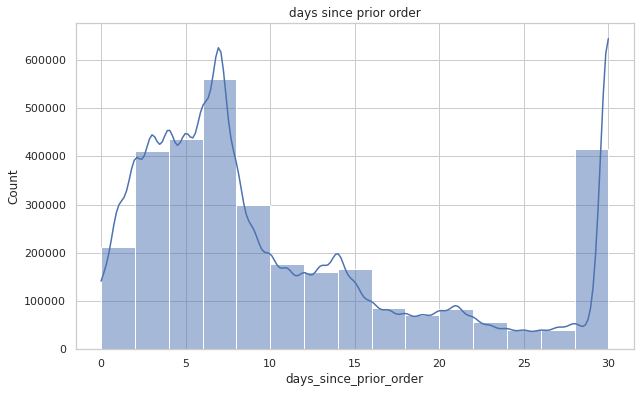

In [ ]:
sns.set_theme(style="whitegrid") #Setting background style
a4_dims = (10, 6) #initiating dimensions 
fig, ax = pyplot.subplots(figsize=a4_dims) #setting the dimensions
sns.histplot(ax=ax,data=orders, x="days_since_prior_order", binwidth=2,kde=True) # plotting histogram with kde which gives a wave (a smoothed-out version)
plt.title('days since prior order');

- After plotting a Histogram of days *since proir order* it is clear that many users usually return to buy early
- There are a lot of returning users that make a purchase within a week 
- So, it is safe to assume that users return to purchase fairly early and stocking up same or similar good is a good idea
- This may not say much about an item reorder but we get a good idea on how many days a user waits before their next order 

#### Time of day and Date of week

In [ ]:
mor=[6,7,8,9,10,11];aft=[12,13,14,15,16];eve=[17,18,19,20];ni=[21,22,23,0];mid=[1,2,3,4,5]  #making bins according to the time

name=[]
for i in orders['order_hour_of_day']:
    if i in mor:
        name.append('Morning')
    if i in aft:
        name.append('Afternoon')       # assigning the name for the particular time frame
    if i in eve:
        name.append('Evening')
    if i in ni:
        name.append('Night')
    if i in mid:
        name.append('Midnight')

orders['time']=name #creating a column with name 

In [ ]:
week=[]
for j in orders['order_dow'].values:
    if j==0:
        week.append('Sunday')
    if j==1:
        week.append('Monday')
    if j==2:
        week.append('Tuesday')  # Giving the name of the week for the numbers given in the dataset
    if j==3:
        week.append('Wednesday')
    if j==4:
        week.append('Thursday')
    if j==5:
        week.append('Friday')
    if j==6:
        week.append('Saturday')
orders['week']=week          #creating a column for the name 

- Now we get a clear picture on what time of day purchases happen 
- Majority of the purchases happen between mid morning and late afternoon and some during evening .
- Very little purchase happens during late evening and midnight , which is normal

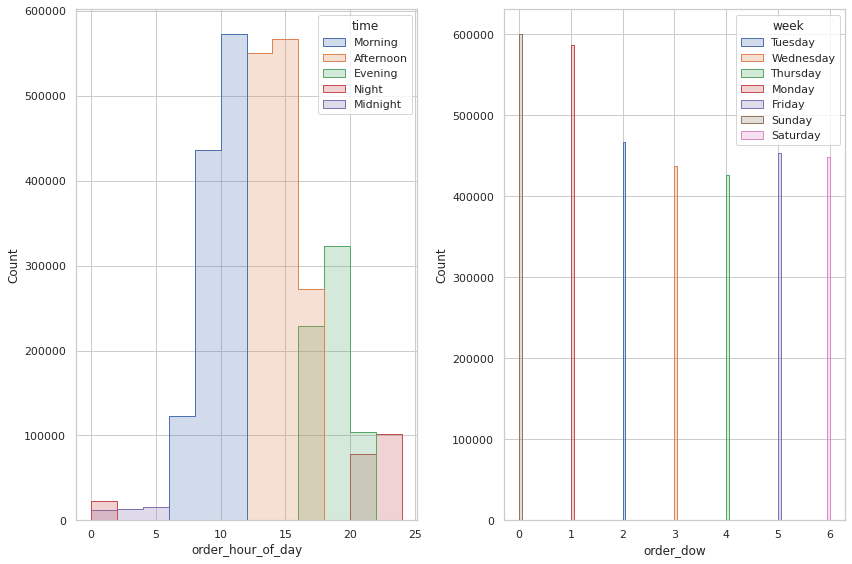

In [ ]:
fig, ax =plt.subplots(1,2,figsize=(12,8)) #subplot size and order
sns.histplot(data=orders,x="order_hour_of_day",hue='time' ,element='step',binwidth=2,ax=ax[0]) #plotting 
sns.histplot(data=orders,x='order_dow',hue='week',element='step', ax=ax[1])
fig.show()
plt.tight_layout() # to not merge the plots

- Plotting histograms for time of day and day of week gives us some good insights on buying patterns
- Coming to the time of day , most people make their orders between mid morning and late afternoon, some in the evening and very few at midnight 
- Looking at the day of week , even though the pattern is mostly evenly spaced ,more orders are on sunday and monday 
- These results don't really come as a surprise as it is the general buying pattern and no abnormality is seen
- Let's combine both and get a clearer picture 

In [ ]:
a = orders.groupby(['time','week'])['order_id'].aggregate("count").reset_index() #group by
a = a.pivot('time', 'week', 'order_id') #data reshape to better fit for a heatmap

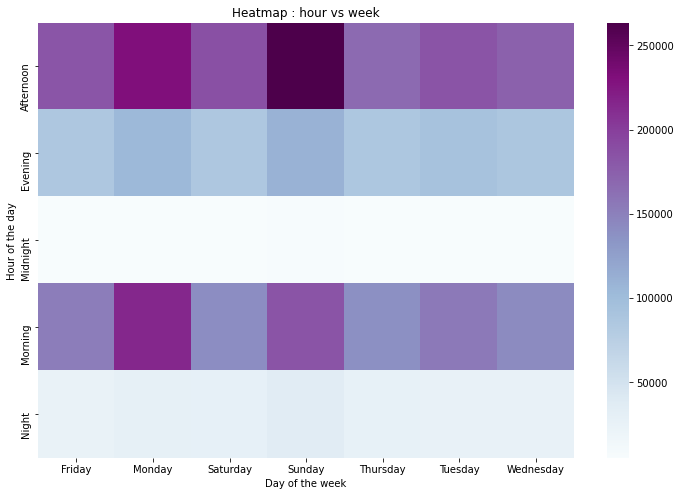

In [ ]:
plt.figure(figsize=(12, 8)) # plot size
sns.heatmap(a, cmap='BuPu') # plotting the heatmap
plt.ylabel('Hour of the day') 
plt.xlabel('Day of the week')
plt.title('Heatmap : hour vs week');

- By plotting a heat map of time of day and day of the week we get a clearer picture of the exact time and day users make their order
- At any given week mornings and afternoons are the time orders usually occur 
- But it does peak on sunday afternoons .
- so, If a user is to order or re-order an item we can say that they usually do so during afternoons and on Sunday/Monday
- We can take this further and try to find what types of products are ordered on what day

In [ ]:
pri_depart=pd.merge(prior, products, how="inner", on="product_id") #merge
pri_depart1=pd.merge(pri_depart, depart, how="inner", on="department_id") #merge
pri_depart2=pd.merge(pri_depart1, orders, how="inner", on="order_id") 
new_dep=pri_depart2[['order_id','order_dow','department_id','week','department','reordered']] #considering only a few columns
new_dep = new_dep[new_dep['reordered'] != 0]  # takinng the data points that are reordered +

In [ ]:
new_dep=pri_depart2[['order_id','week','department']]
c1 = new_dep.groupby(['department', 'week'])['order_id'].aggregate("count").reset_index()
c1 = c1.pivot('department', 'week', 'order_id')

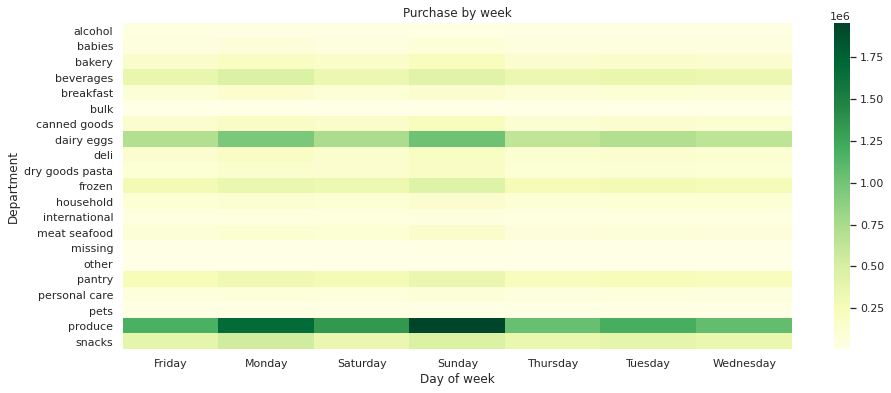

In [ ]:
plt.figure(figsize=(15, 6))
sns.heatmap(c1, cmap='YlGn')
plt.xlabel('Day of week')
plt.ylabel('Department')
plt.title('Purchase by week');

- plotting a heatmap of day of week and departments ,We find the same patters as before 
- More orders occur on sunday and those orders belong to produce 
- A few more observations include produce being consistently ordered thoughout the week 
- dairy eggs and snacks being just behind 
- Hence , at any given day of the week , an item belonging to Produce department has the highest chance of being reordered closely followed by dairy eggs and snacks

#### Summary

Upon analysing the datasets a few conclusions can be made:
- The most popular items purchased belong to produce i.e organic fruits and vegetables with the most re-ordered item being the Banana
- This also coincides with the observation that the top 3 popular aisles being fruits and vegetables
- most users return to make a purchase within a week 
- Purchases are most active between morning and afternoon and on sundays and mondays 
- Items in produce are consistently ordered throughout the week 
- Apart from Fruits and vegetables Dairy eggs and snacks are also a popular choice 